<a href="https://colab.research.google.com/github/ebalogun01/ME343_PROJ/blob/master/ME343_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, Activation, LSTM, Embedding
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
import numpy as np
import os
import pandas as pd
from tensorflow.keras import layers


In [0]:
data2015 = np.genfromtxt('/content/drive/My Drive/ProjectData/power_data_2015.csv')
data2016 =  np.genfromtxt('/content/drive/My Drive/ProjectData/power_data_2016.csv')
data2017 =  np.genfromtxt('/content/drive/My Drive/ProjectData/power_data_2017.csv')
data2018 =  np.genfromtxt('/content/drive/My Drive/ProjectData/power_data_2018.csv')

In [0]:
data = np.vstack([data2015[7:,], data2016, data2017])
test = data2018[:-1,]  # removing bad data

In [4]:
test.shape

(304, 96)

In [0]:
data.size
history_size = 14
n_hidden = [200, 200, 200, 200, 96]


In [0]:
def generateDNN(input_dim, output_dim, n_layer, n_hidden, optimizer_meth, act_fcn, learning_rate=0.0001, reg=0.001):
  model = tf.keras.models.Sequential()

  model.add(Dense(units=n_hidden[1], input_dim=input_dim, activation=act_fcn,
                  kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(reg)))
  model.add(Dense(units=n_hidden[1], input_dim=200, activation=act_fcn,
                  kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(reg)))
  model.add(Dense(units=n_hidden[1], input_dim=200, activation=act_fcn,
                  kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(reg)))
  model.add(Dense(units=n_hidden[1], input_dim=200, activation=act_fcn,
                  kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(reg)))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(96, activation='linear'))
  model.compile(loss='mse', optimizer=optimizer_meth, metrics=['mse', 'mae'])
  # model.optimizer.learning_rate.assign(learning_rate)
  return model


In [7]:
data.shape    

(949, 96)

In [8]:
# Split into x and y This is for predicting next day's load using current day's data
x = data[0:data.shape[0]-1,:]
y = data[1:,:]
print(x.shape)
print(y.shape)
data.shape

(948, 96)
(948, 96)


(949, 96)

In [0]:
def train(model, x_train, y_train, batch_size, epochs=1000, verbose=1, validation_split=.2):
  history = model.fit(x_train, y_train, batch_size=batch_size,
  epochs=epochs, validation_split=0.2, verbose=0)
  total_history_train = model.history.history['loss']
  total_history_val = model.history.history['val_loss']
  plt.plot(total_history_train, label='training')
  plt.plot(total_history_val, label='validation')
  plt.title('Training and Validation Loss')
  plt.ylabel('MSE')
  plt.xlabel('No. epoch')
  plt.legend()
  plt.show()
  print("final loss training loss is: {}".format(total_history_train[-1]))
  print("final loss validation is: {}".format(total_history_val[-1]))
  return total_history_val[-1]

In [0]:
def hyp_tuning(data_x, data_y, model_fcn, no_hidden, learning_rate = [1e-4, 1e-3, 1e-2, .1], regularization = [1e-4, 1e-3, 1e-2, .1]):
  losses = np.empty((4,4))
  for i in range(len(learning_rate)):
    for j in range(len(regularization)):
      lr, reg = learning_rate[i], regularization[j]
      model = model_fcn(96, 96, len(no_hidden), no_hidden, 'Adam', 'tanh', lr, reg)
      min_val_loss = train(model, data_y, data_x, 50, 20)
      losses[i, j] = min_val_loss
  i_min, j_min = np.where(losses == np.min(losses))
  print(i_min)
  print(j_min)
  i_min = int(i_min)
  j_min = int(j_min)
  opt_lr = learning_rate[i_min]
  opt_reg = regularization[j_min]
  print("Optimal learning rate is {}".format(opt_lr))
  print("Optimal regularization coefficient is {}".format(opt_reg))
  return opt_lr, opt_reg

In [0]:
# Normalize input and output of the network:
std_x = np.std(x, axis=0)
std_x[std_x==0] = 1
mean_x = np.mean(x,axis=0)
std_y = np.std(y,0)
std_y[std_y==0] = 1
mean_y = np.mean(y,0)
X_train = (x - mean_x)/std_x #network input
Y_train = (y - mean_y)/std_y #network ouput

In [0]:
# Normalize input of the test data:
std_test = np.std(test, axis=0)
std_test[std_test==0] = 1
mean_test = np.mean(test,axis=0)
test_norm = (test - mean_test)/std_test #network input
# Y_train = (y - mean_y)/std_y #network ouput

In [12]:
print(X_train.shape)
Y_train = Y_train

(948, 96)


In [13]:
Y_train.shape

(948, 96)

In [0]:
Y_train

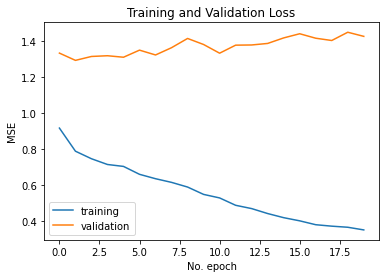

final loss training loss is: 0.350824236869812
final loss validation is: 1.4270597696304321


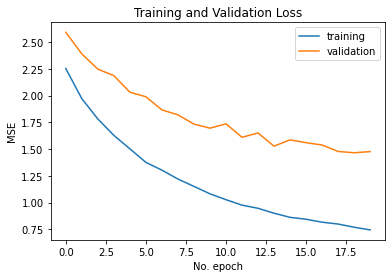

final loss training loss is: 0.7437009215354919
final loss validation is: 1.4763494729995728


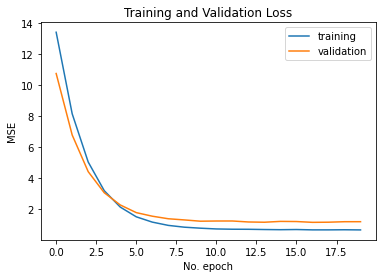

final loss training loss is: 0.6417514681816101
final loss validation is: 1.1718682050704956


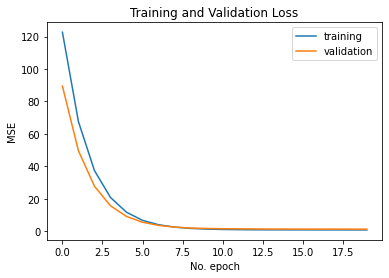

final loss training loss is: 0.7522827982902527
final loss validation is: 1.2109646797180176


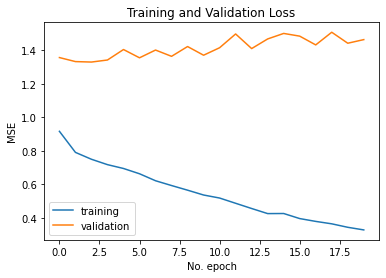

final loss training loss is: 0.32765114307403564
final loss validation is: 1.4640045166015625


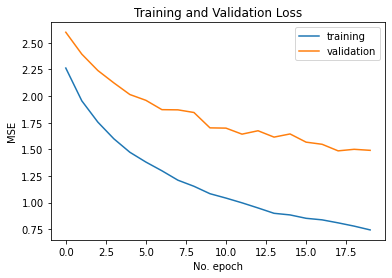

final loss training loss is: 0.7433251142501831
final loss validation is: 1.4904656410217285


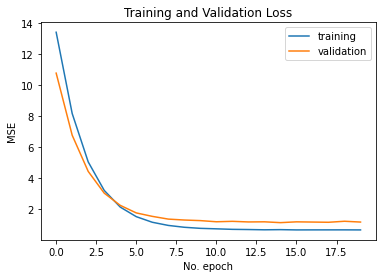

final loss training loss is: 0.6519561409950256
final loss validation is: 1.1597789525985718


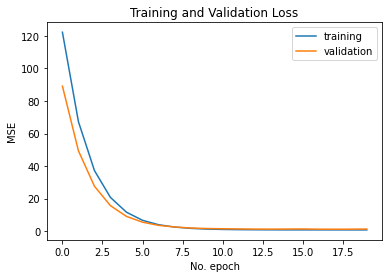

final loss training loss is: 0.7525861859321594
final loss validation is: 1.2962071895599365


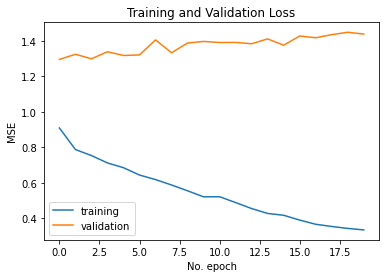

final loss training loss is: 0.3342604339122772
final loss validation is: 1.4385261535644531


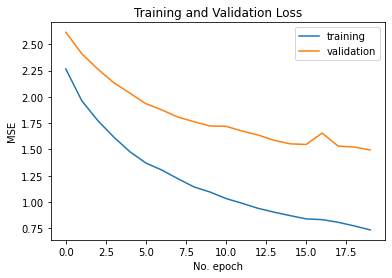

final loss training loss is: 0.7362167835235596
final loss validation is: 1.4958622455596924


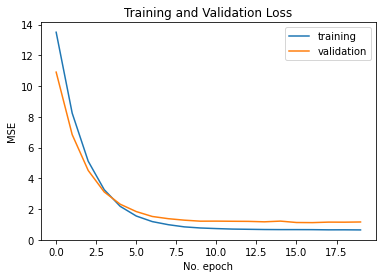

final loss training loss is: 0.6412287354469299
final loss validation is: 1.1576355695724487


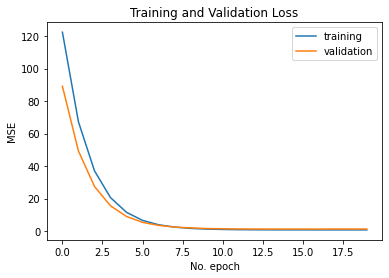

final loss training loss is: 0.7525520324707031
final loss validation is: 1.2898237705230713


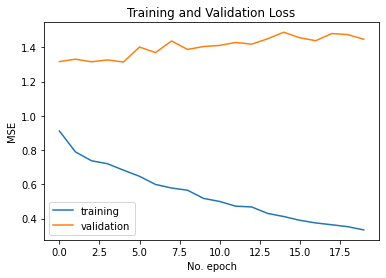

final loss training loss is: 0.3334672152996063
final loss validation is: 1.447617530822754


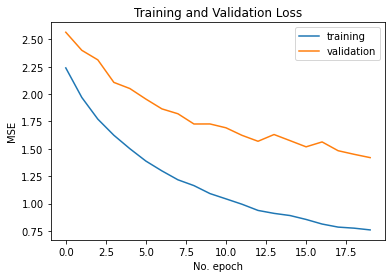

final loss training loss is: 0.7590981125831604
final loss validation is: 1.419817328453064


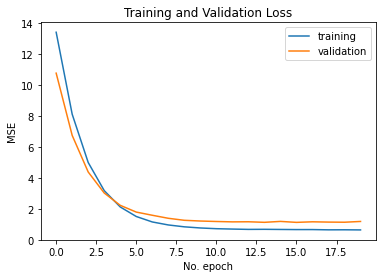

final loss training loss is: 0.6363341212272644
final loss validation is: 1.1826586723327637


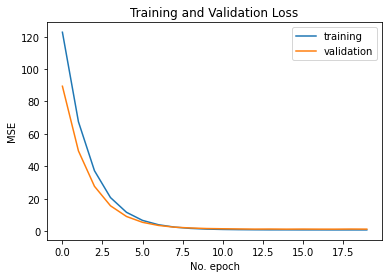

final loss training loss is: 0.7409393191337585
final loss validation is: 1.2239595651626587
[2]
[2]
Optimal learning rate is 0.01
Optimal regularization coefficient is 0.01


In [16]:
opt_lr, opt_reg = hyp_tuning(X_train, Y_train, generateDNN, n_hidden)

In [88]:
input_dim = (96)
output_dim = 96
nlayer = 4
DNN_model = generateDNN(input_dim, output_dim, nlayer, n_hidden, 'Adam', 'tanh')
DNN_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 200)               19400     
_________________________________________________________________
dense_121 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_122 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_123 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_124 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_125 (Dense)            (None, 96)                19296     
Total params: 199,496
Trainable params: 199,496
Non-trainable params: 0
_______________________________________________

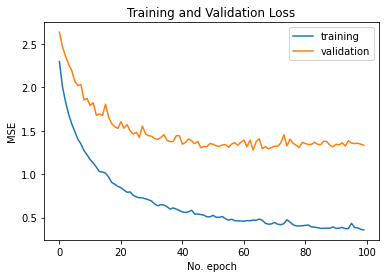

final loss training loss is: 0.3584130108356476
final loss validation is: 1.3342077732086182


1.3342077732086182

In [89]:
train(DNN_model, X_train, Y_train, 30, epochs=100)


In [90]:
true_value = test[15,]
input_ = test_norm[14, ]
input_.shape = (1, 96)
y = test[15, ]
print(input_.shape)
y_pred = DNN_model.predict(input_) * std_test + mean_test
print("Mean Square Error is {}".format(np.sqrt(np.mean((y_pred-true_value)**2))))

(1, 96)
Mean Square Error is 46.21955593422911


The error above is set as a baseline MSE for the predicted load. As we can see the DNN is able to follow the actual load shape of the next day, but performs poorly as it approaches the peak, and thereafter. This was one consistent observation. Based on current day data, we anticipate there will be much larger errors for predicting weekends, where this DNN will possibly fail. 

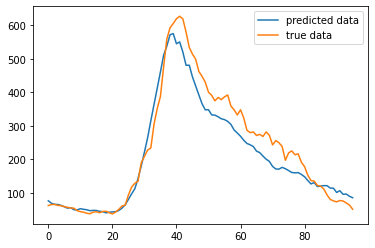

In [87]:
plt.plot(y_pred.T)
plt.plot(true_value.T)
plt.legend(["predicted data", "true data"])
plt.show()


Now let's try to predict the load shape for a weekend, based on the previous day's load data. We take a typical Friday during the summer and try to predict the loadshape on saturday. Because of the huge change in charging behavior on weekends, the DNN should perform poorly. 

In [113]:
input_ = test_norm[151, ]
true_value = test[152,]
input_.shape = (1, 96)
print(input_.shape)
y_pred = DNN_model.predict(input_) * std_test + mean_test
print("Mean Square Error is {}".format(np.sqrt(np.mean((y_pred-true_value)**2))))

(1, 96)
Mean Square Error is 120.48098298012168


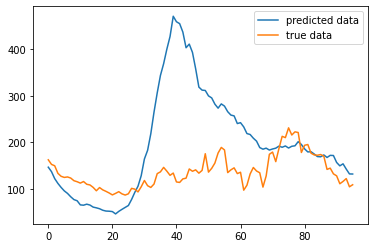

In [114]:
plt.plot(y_pred.T)
plt.plot(true_value.T)
plt.legend(["predicted data", "true data"])
plt.show()

For the weekend, we can observe that the prediction is extremely off. A regular DNN will have a hard time accurately obtaining weekend loadshapes, but using an LSTM, we will be able to improve performance.

In [0]:
def generateLSTM(n_layer, n_hidden, optimizer_meth, learning_rate=0.001, reg=0.002):
  model = tf.keras.models.Sequential()
  # model.add(Embedding(input_dim=(96,), ))
  # model.add(layers.Input(shape=input_dim))
  model.add(LSTM(units=100, return_sequences=True, input_shape=(14, 96)))
  for i in range(1):
    model.add(LSTM(100, return_sequences=True, dropout=0.1, recurrent_dropout=0.1, activation='tanh',recurrent_activation='sigmoid'))
    # model.add(Dropout(0.5))
  model.add(LSTM(100, return_sequences=False, dropout=0.1, recurrent_dropout=0.1, activation='tanh',recurrent_activation='sigmoid'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(96, activation='linear'))
  model.compile(loss='mse', optimizer=optimizer_meth, metrics=['mse', 'mae'])
  model.optimizer.learning_rate.assign(learning_rate)
  return model

In [0]:
# Split into x and y
x = data[0:data.shape[0]-1,:]
y = data[14:,:]
print(x.shape)
print(y.shape)
data.shape

In [0]:
LSTM_model = generateLSTM(nlayer, n_hidden, 'Adam')
LSTM_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 14, 100)           78800     
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_22 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_23 (Dense)             (None, 96)                19296     
Total params: 198,696
Trainable params: 198,696
Non-trainable params: 0
_________________________________________________________________


In [0]:
std_x = np.std(x, axis=0)
std_x[std_x==0] = 1  # this is done to avoid dividing by zero
mean_x = np.mean(x,axis=0)
std_y = np.std(y,0)
std_y[std_y==0] = 1
mean_y = np.mean(y,0)
X_train = (x - mean_x)/std_x #network input
Y_train = (y - mean_y)/std_y #network ouput

In [0]:
std_test = np.std(test, axis=0)
std_test[std_test==0] = 1
mean_test = np.mean(test,axis=0)
test_norm = (test - mean_test)/std_test #network input

In [0]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices,:])
    
  return np.array(data)


In [0]:
past_history = 14
future_target = 0
STEP = 1

x_train = multivariate_data(X_train, Y_train, 0, data.shape[0], past_history, 
                            future_target, STEP)
y_train = Y_train

In [0]:
x_train.shape


(935, 14, 96)

In [0]:
x_train[1:5].shape

In [0]:
y_train.shape

(935, 96)

In [0]:
BATCH_SIZE = 56
BUFFER_SIZE = 1000

train_= tf.data.Dataset.from_tensor_slices((x_train[0:735], y_train[0:735]))
train_ = train_.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_ = tf.data.Dataset.from_tensor_slices((x_train[735:], y_train[735:]))
val_ = val_.batch(BATCH_SIZE).repeat()

In [0]:
history = LSTM_model.fit(train_, epochs=100, steps_per_epoch=50, validation_data=val_, validation_steps=50)

In [0]:
# Now let's test t[138:152]he LSTM model to see results
# test_norm = np.reshape(test_norm[138:152], (1, 14, 96))
test_input = test_norm[138-10:152-10]
test_input = np.reshape(test_norm[138-10:152-10], (1, 14, 96))
true_value = test[152-10]
# input_.shape = (1, 96)
# print(input_.shape)
y_pred = LSTM_model.predict(test_input) * std_test + mean_test
print("Mean Square Error is {}".format(np.sqrt(np.mean((y_pred-true_value)**2))))

Mean Square Error is 45.39052039344354


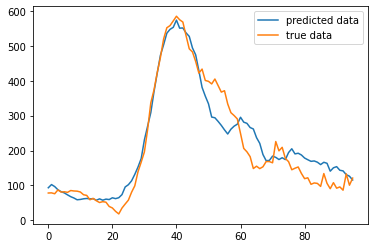

In [0]:
plt.plot(y_pred.T)
plt.plot(true_value.T)
plt.legend(["predicted data", "true data"])
plt.show()

From this, we can see that the LSTM model outperforms the DNN model for predicting weekend charging profile. This was anticipated due to the fact that the LSTM models have the ability to store past information in memory to use as reference for prediction. Also, the LSTM performs bettery at capturing the peaks, and thus follows the expected load more closely throughout the day. 

Mean Square Error is 53.07426349624412


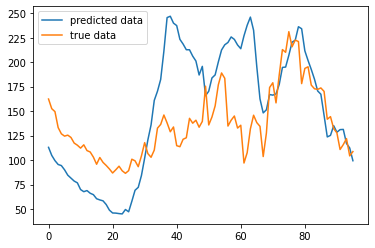

In [0]:
# Now let's test t[138:152]he LSTM model to see results
# test_norm = np.reshape(test_norm[138:152], (1, 14, 96))
test_input = np.reshape(test_norm[138:152], (1, 14, 96))
true_value = test[152]
# input_.shape = (1, 96)
# print(input_.shape)
y_pred = LSTM_model.predict(test_input) * std_test + mean_test
print("Mean Square Error is {}".format(np.sqrt(np.mean((y_pred-true_value)**2))))
plt.plot(y_pred.T)
plt.plot(true_value.T)
plt.legend(["predicted data", "true data"])
plt.show()

()